In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import time 
import os 
from IPython.display import clear_output 

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve 

In [36]:
sample_size = 3000 
width = 15
height = 15

In [37]:
files = ['def_front', 'ok_front']
adress = 'C:\\Users\\user\\Documents\\Python Scripts\\New folder\\casting_data\\casting_data\\train\\{}'
data_train = {}
for f in files:
    data_train[f]=[]
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpeg'):
            data_train[col].append(i)
            

In [38]:
files = ['def_front', 'ok_front']
adress = 'C:\\Users\\user\\Documents\\Python Scripts\\New folder\\casting_data\\casting_data\\test\\{}'
data_test = {}
for f in files:
    data_test[f]=[]
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpeg'):
            data_test[col].append(i)

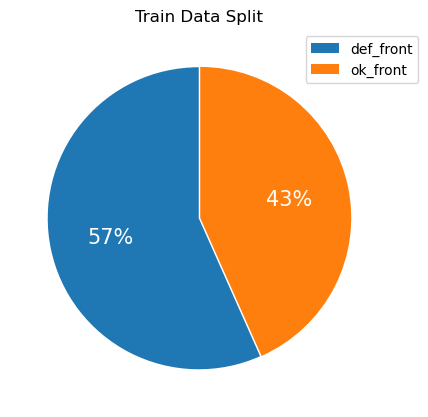

In [39]:
sizes = [len(data_train['def_front']), len(data_train['ok_front'])]

plt.figure(figsize=(10,5), dpi=100)

plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90,explode=(0,.01))
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Train Data Split")
plt.show()

In [40]:
start = time.time() 
image_data_train = []
image_target_train = []

for title in files:
    os.chdir('C:\\Users\\user\\Documents\\Python Scripts\\New folder\\casting_data\\casting_data\\train\\{}'.format(title))
    counter = 0
    for i in data_train[title]:
        img = cv2.imread(i,0)
        image_data_train.append(cv2.resize(img,(width, height)).flatten())
        image_target_train.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Compiled Class ok_front
Calculate Time 7.08198


In [41]:
start = time.time()
image_data_test = []
image_target_test = []

for title in files:
    os.chdir('C:\\Users\\user\\Documents\\Python Scripts\\New folder\\casting_data\\casting_data\\test\\{}'.format(title))
    counter = 0
    for i in data_test[title]:
        img = cv2.imread(i,0)
        image_data_test.append(cv2.resize(img,(width, height)).flatten())
        image_target_test.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Compiled Class ok_front
Calculate Time 0.89046


In [42]:
image_data_train = np.array(image_data_train)
size_train = image_data_train.shape[0]
image_data_train.shape

(5875, 225)

In [43]:
image_data_test = np.array(image_data_test)
size_test = image_data_test.shape[0]
image_data_test.shape

(715, 225)

In [44]:
labels = LabelEncoder()
labels.fit(image_target_train)

LabelEncoder()

In [45]:
train_images = image_data_train / 255.0
test_images = image_data_test / 255.0

train_labels = labels.transform(image_target_train)
test_labels = labels.transform(image_target_test)


Acc: 0.98


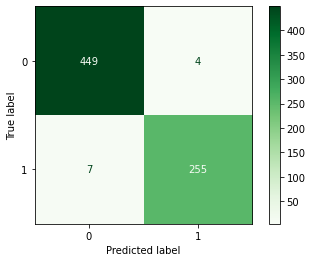

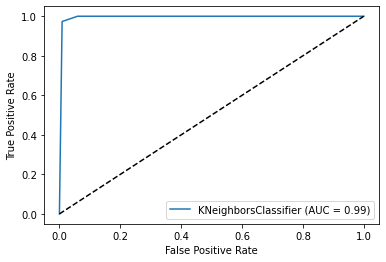

In [46]:
model = KNeighborsClassifier(2)
model.fit(train_images, train_labels)

y_pred = model.predict(test_images)

print("Acc:",round(accuracy_score(test_labels,y_pred),2))

plot_confusion_matrix(model,test_images, test_labels, cmap='Greens')
plt.show()

plot_roc_curve(model,test_images, test_labels)
plt.plot([0,1],[0,1],'k--')
plt.show()

In [15]:
def Prediction(image):
    global model, width, height
    
    img = cv2.imread(image,0)
    img = cv2.resize(img,(width, height)).flatten() / 255.0
    
    pred = model.predict([img])
    
    if (pred==1):
        result = 'ok_front'
    else:
        result = 'def_front'
    

    
    return result

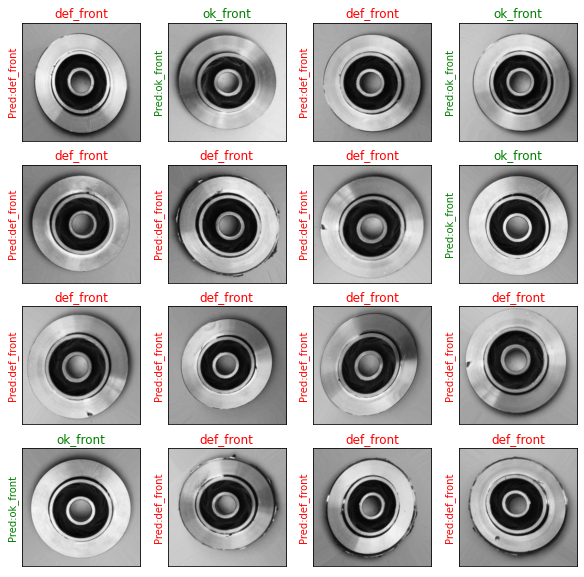

In [16]:
plt.figure(figsize=(10,10))
for i in range(1,17):
    front = np.random.choice(['def_front','ok_front'])
    sample = np.random.choice(np.arange(1,200))
    os.chdir('C:\\Users\\user\\Documents\\Python Scripts\\New folder\\casting_data\\casting_data\\test\\{}'.format(front))
    image = cv2.imread(data_test[front][sample],0)
    plt.subplot(4,4,i)
    plt.imshow(image,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    if front == 'ok_front':
        c = 'green'
    else:
        c = 'red'
    plt.title(front, color=c)
    plt.ylabel("Pred:{}".format(Prediction(data_test[front][sample])),color=c)
    
plt.show()